IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*

# TD-TME07: algorithmes d'apprentissage non-supervisé

L'objectif de cette séance est d'implémenter des algorithmes d'apprentissage non-supervisé (cf. cours 8), en particulier, l'algorithme de classification hiérarchique.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

CARNIELLI Ariana

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>TD-TME07</tt> et rajouter à la suite de <tt>TD-TME07</tt> les noms des membres du binômes séparés par un tiret.


## Préparation

L'archive récupérée avec ce fichier contient aussi le répertoire <code>data</code> qui contient les bases pour expérimenter vos fonctions.

Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles :

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

## Travail à réaliser

Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage "base-Paris.csv".

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par <code>pd.read()</code> fournit un <code>DataFrame</code> que vous avez appris à manipuler dans les séances précédentes.

In [2]:
# Par exemple:
data_2D = pd.read_csv("data/base-2D.csv")
print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


<font size="+1" color="RED">**[Q]**</font> Exécuter le code suivant qui permet de réaliser une représentation graphique de cette base d'apprentissage.


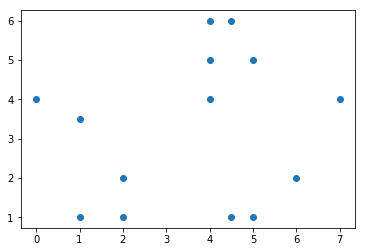

In [3]:
M_data2D= data_2D.to_numpy()      # conversion du DataFrame en matrice pour la commande suivante
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y);  # affichage des points

J'ai changé la méthode `as_matrix()` par la méthode `to_numpy()` car la première est depreciée. 

## Fonctions préliminaires

### Normalisation des données

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>normalisation</code> qui prend en argument un <code>DataFrame</code> et rend la matrice obtenue en normalisant chaque colonne de ce <code>DataFrame</code> en appliquant la normalisation vue en cours.


In [4]:
def normalisation(df):
    mat = df.to_numpy() 
    for i in range(mat.shape[1]):
        mat[:,i] = (mat[:,i] - mat[:,i].min())/(mat[:,i].max() - mat[:,i].min())
    return mat

**[Q]** Normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

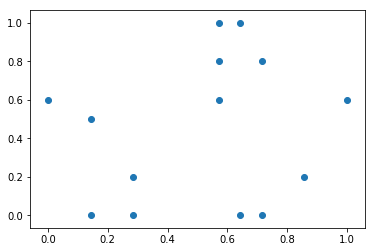

In [5]:
M_data2D_norm= normalisation(data_2D)    
colonne_X= M_data2D[:,0]        
colonne_Y= M_data2D[:,1]        
plt.scatter(colonne_X, colonne_Y);

Comme attendu, l'affichage ne change presque pas. La seule différence sont les axes qui maintenant ont des valeurs entre 0 et 1.

### Distances entre exemples

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_euclidienne_vect</code> qui prend en argument deux exemples sous la forme de vecteurs et rend leur distance euclidienne. 

In [6]:
def dist_euclidienne_vect(vect1, vect2):
    return np.linalg.norm(vect1 - vect2)

In [7]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance euclidienne entre v1 et v2 : ", dist_euclidienne_vect(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance euclidienne entre v1 et v2 :  0.17437936593905287


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_manhattan_vect</code> qui prend en argument deux exemples et rend leur distance de Manhattan. 

In [8]:
def dist_manhattan_vect(vect1, vect2):
    return np.linalg.norm((vect1 - vect2), 1)

Pour les deux cas la fonction `linalg.norm()` déjà existante en Numpy calcule les distances de façon efficace.

In [9]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance de Manhattan entre v1 et v2 : ", dist_manhattan_vect(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance de Manhattan entre v1 et v2 :  0.24285714285714283


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_vect</code> qui prend en argument une chaîne de caractères (soit la chaîne "euclidienne", soit "manhattan") ainsi que deux vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.

In [10]:
def dist_vect(chaine, vect1, vect2):
    if chaine == "euclidienne":
        return dist_euclidienne_vect(vect1, vect2)
    else:
        return dist_manhattan_vect(vect1, vect2)

In [11]:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

for nom in ["euclidienne", "manhattan"] :
    print("distance ", nom, " entre v1 et v2 :\t", dist_vect(nom,v1,v2))


v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance  euclidienne  entre v1 et v2 :	 0.17437936593905287
distance  manhattan  entre v1 et v2 :	 0.24285714285714283


### Calcul de centroides

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>centroide</code> qui, étant donné une matrice représentant plusieurs exemples rend le centroide (calculé en faisant la moyenne de chaque composante des vecteurs de la matrice).
On fait l'hypothèse que la matrice contient toujours au moins un exemple.

In [12]:
def centroide(mat):
    return mat.mean(0)

In [13]:
M_data2D

array([[0.        , 0.6       ],
       [0.14285714, 0.5       ],
       [0.14285714, 0.        ],
       [0.28571429, 0.        ],
       [0.28571429, 0.2       ],
       [0.57142857, 0.6       ],
       [0.57142857, 0.8       ],
       [0.57142857, 1.        ],
       [0.64285714, 0.        ],
       [0.64285714, 1.        ],
       [0.71428571, 0.        ],
       [0.71428571, 0.8       ],
       [0.85714286, 0.2       ],
       [1.        , 0.6       ]])

In [14]:
centroide(M_data2D)

array([0.51020408, 0.45      ])

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche "centroid linkage").

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_groupes</code> qui prend en argument une chaîne de caractères (soit "euclidienne", soit "manhattan") ainsi que deux groupes de vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.


In [15]:
def dist_groupes(chaine, mat1, mat2):
    cent1 = centroide(mat1)
    cent2 = centroide(mat2) 
    #print("centroide 1 : ", cent1)
    #print("centroide 2 : ", cent2)
    return dist_vect(chaine, cent1, cent2)

In [16]:
# par exemple :
dist_groupes("euclidienne", M_data2D[0:4], M_data2D[5:13])

0.586345478713841

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est une matrice contenant les exemples qui sont dans le cluster correspondant.

On appelle "partition" un tel dictionnaire.


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>initialise</code> qui, étant donné une matrice M d'exemples, rend un dictionnaire contenant autant d'entrées que d'exemples dans M. Dans ce dictionnaire, une clé est numéro d'exemple (un entier compris entre 0 et n-1, le nombre d'exemples) et la valeur associée est une matrice d'exemples contenant un exemple de M.

In [17]:
def initialise(M):
    return {i: M[i,:].reshape((1,M.shape[1])) for i in range(M.shape[0])}

In [18]:
# Par exemple:
depart = initialise(M_data2D)
# cette partition contient autant de clusters que d'exemples: on a un cluster par exemple.
depart 

{0: array([[0. , 0.6]]),
 1: array([[0.14285714, 0.5       ]]),
 2: array([[0.14285714, 0.        ]]),
 3: array([[0.28571429, 0.        ]]),
 4: array([[0.28571429, 0.2       ]]),
 5: array([[0.57142857, 0.6       ]]),
 6: array([[0.57142857, 0.8       ]]),
 7: array([[0.57142857, 1.        ]]),
 8: array([[0.64285714, 0.        ]]),
 9: array([[0.64285714, 1.        ]]),
 10: array([[0.71428571, 0.        ]]),
 11: array([[0.71428571, 0.8       ]]),
 12: array([[0.85714286, 0.2       ]]),
 13: array([[1. , 0.6]])}

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (approche "centroid linkage").

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour n'en former qu'un seul qui est ajouté à la partition, alors que les 2 clusters initiaux sont retirés de la partition.
On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>fusionne</code> qui prend en argument un nom de distance ("euclidienne" ou "manhattan") et une partition C0 et qui rend 4 valeurs :
- la partition C1 obtenue après fusion des 2 clusters les plus proches ;
- les clés des 2 clusters de C0 qui ont été fusionnés et qui ont donc aussi été retirés de C1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

In [19]:
def fusionne(chaine, C0):
    minA = 0
    minB = 0
    dist_min = float("inf")
    for i in C0:
        for j in C0:
            if i != j:
                if dist_groupes(chaine, C0[i], C0[j]) < dist_min:
                    minA = i
                    minB = j
                    dist_min = dist_groupes(chaine, C0[i], C0[j])
    res = {i: C0[i] for i in C0 if i != minA and i != minB}
    res[max(C0) + 1] = np.concatenate((C0[minA], C0[minB]))
    print("Fusion de {} et {} pour une distance de {}".format(minA, minB, dist_min))
    return res, minA, minB, dist_min    

In [20]:
# Par exemple:
depart = initialise(M_data2D)
fusionne("euclidienne",depart)  

Fusion de 8 et 10 pour une distance de 0.0714285714285714


({0: array([[0. , 0.6]]),
  1: array([[0.14285714, 0.5       ]]),
  2: array([[0.14285714, 0.        ]]),
  3: array([[0.28571429, 0.        ]]),
  4: array([[0.28571429, 0.2       ]]),
  5: array([[0.57142857, 0.6       ]]),
  6: array([[0.57142857, 0.8       ]]),
  7: array([[0.57142857, 1.        ]]),
  9: array([[0.64285714, 1.        ]]),
  11: array([[0.71428571, 0.8       ]]),
  12: array([[0.85714286, 0.2       ]]),
  13: array([[1. , 0.6]]),
  14: array([[0.64285714, 0.        ],
         [0.71428571, 0.        ]])},
 8,
 10,
 0.0714285714285714)

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour construire un dendrogramme, il est nécessaire de construire la matrice suivante (que l'on appelle <code>M_Fusion</code> dans ce qui suit): pour chaque ligne, cette matrice contient 4 colonnes :
- les 2 premières colonnes contiennent les clés des groupes fusionnés ;
- la 3e colonne contient la distance qui séparait ces 2 groupes ;
- la 4e colonne contient la valeur 2 (c'est une valeur sans importance pour nous).
 

In [21]:
# Exemple de construction de la matrice M_Fusion en utilisant les fonctions écrites
# dans les questions précédentes

# initialisation 
courant = initialise(M_data2D)       # clustering courant, au départ:s données data_2D normalisées
M_Fusion = []                        # initialisation
while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
    new,k1,k2,dist_min = fusionne('euclidienne',courant)
    if(len(M_Fusion)==0):
        M_Fusion = [k1,k2,dist_min,2]
    else:
        M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
    courant = new
    
print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)

Fusion de 8 et 10 pour une distance de 0.0714285714285714
Fusion de 7 et 9 pour une distance de 0.07142857142857151
Fusion de 2 et 3 pour une distance de 0.14285714285714285
Fusion de 6 et 11 pour une distance de 0.1428571428571429
Fusion de 0 et 1 pour une distance de 0.17437936593905287
Fusion de 15 et 17 pour une distance de 0.20316375219039837
Fusion de 4 et 16 pour une distance de 0.21237241067597867
Fusion de 12 et 14 pour une distance de 0.26811891970176366
Fusion de 5 et 19 pour une distance de 0.3047456282855976
Fusion de 13 et 22 pour une distance de 0.4542857142857144
Fusion de 20 et 21 pour une distance de 0.5000000000000001
Fusion de 18 et 24 pour une distance de 0.638139657302555
Fusion de 23 et 25 pour une distance de 0.6796842379114776

La matrice M_Fusion obtenue :
 [[ 8.         10.          0.07142857  2.        ]
 [ 7.          9.          0.07142857  2.        ]
 [ 2.          3.          0.14285714  2.        ]
 [ 6.         11.          0.14285714  2.        ]
 [

Une fois la matrice <code>M_Fusion</code> construite, le tracé d'un histogramme s'effectue avec le code suivant :

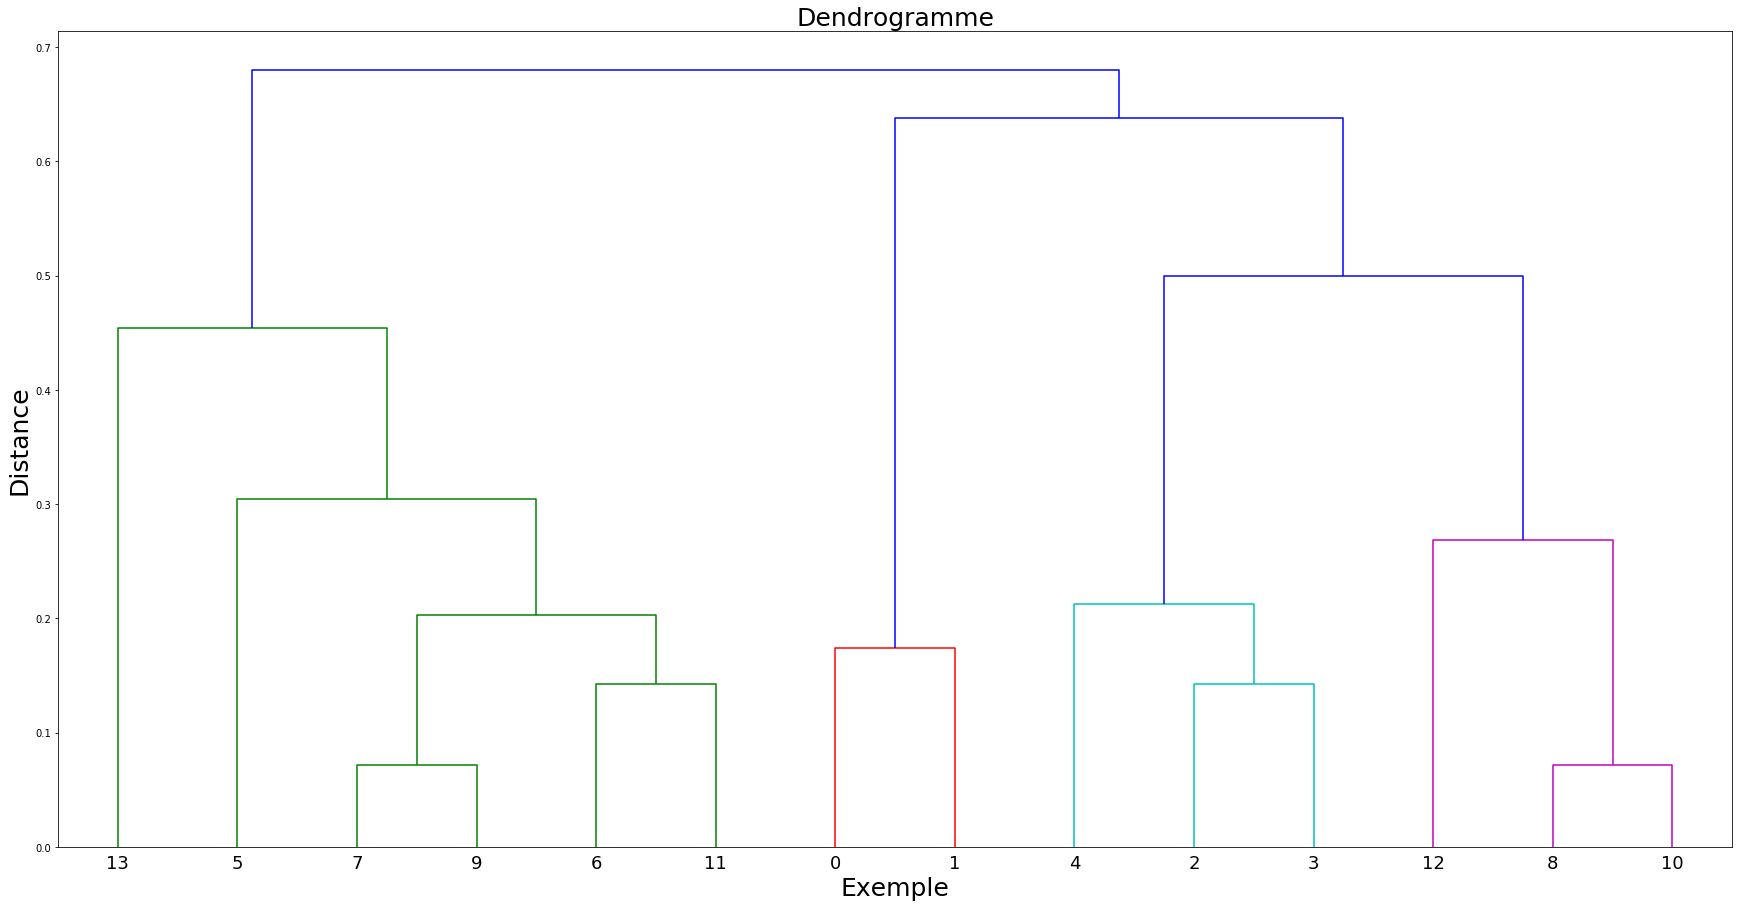

In [22]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel('Exemple', fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme à partir de la matrice M_Fusion:
scipy.cluster.hierarchy.dendrogram(
    M_Fusion,
    leaf_font_size=18.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>clustering_hierarchique</code> qui, pour une base d'apprentissage et un nom de distance donné, permet de réaliser un clustering hiérarchique et de tracer le dendrogramme obtenu.

La fonction rend la matrice <code>M_Fusion</code> construite.

In [61]:
def clustering_hierarchique(chaine, df, x_names = None):
    courant = initialise(df)       # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        novo, k1, k2, dist_min = fusionne(chaine, courant)
        if(len(M_Fusion) == 0):
            M_Fusion = [k1, k2, dist_min, 2]
        else:
            M_Fusion = np.vstack([M_Fusion,[k1, k2, dist_min, 2]])
        courant = novo
    dessine_dendrogramme(M_Fusion, x_names)
    return M_Fusion


def dessine_dendrogramme(M_Fusion, x_names = None):
    # Paramètre de la fenêtre d'affichage: 
    fig, ax = plt.subplots(figsize=(30, 15)) # taille : largeur x hauteur
    ax.set_title('Dendrogramme', fontsize=25)    
    ax.set_xlabel('Exemple', fontsize=25)
    ax.set_ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )
    
    if x_names is not None:
        curr_labels = [int(label.get_text()) for label in ax.get_xticklabels()]
        ax.set_xticklabels([x_names[i] for i in curr_labels])
        
    # Affichage du résultat obtenu:
    plt.show()


### Comparaison de distances

<font size="+1" color="RED">**[Q]**</font> Réaliser un clustering en utilisant la distance de Manhattan. Comparer les résultats obtenus avec cette distance avec ceux obtenus avec la distance euclidienne. Est-ce que l'utilisation de cette distance vous semble pertinent?

Clustering en utilisant la distance de Manhattan
Fusion de 8 et 10 pour une distance de 0.0714285714285714
Fusion de 7 et 9 pour une distance de 0.07142857142857151
Fusion de 2 et 3 pour une distance de 0.14285714285714285
Fusion de 6 et 11 pour une distance de 0.1428571428571429
Fusion de 15 et 17 pour une distance de 0.23571428571428554
Fusion de 0 et 1 pour une distance de 0.24285714285714283
Fusion de 4 et 16 pour une distance de 0.27142857142857146
Fusion de 5 et 18 pour une distance de 0.35357142857142854
Fusion de 12 et 14 pour une distance de 0.3785714285714285
Fusion de 20 et 22 pour une distance de 0.5000000000000001
Fusion de 13 et 21 pour une distance de 0.6257142857142859
Fusion de 19 et 24 pour une distance de 0.857142857142857
Fusion de 23 et 25 pour une distance de 0.7095238095238097


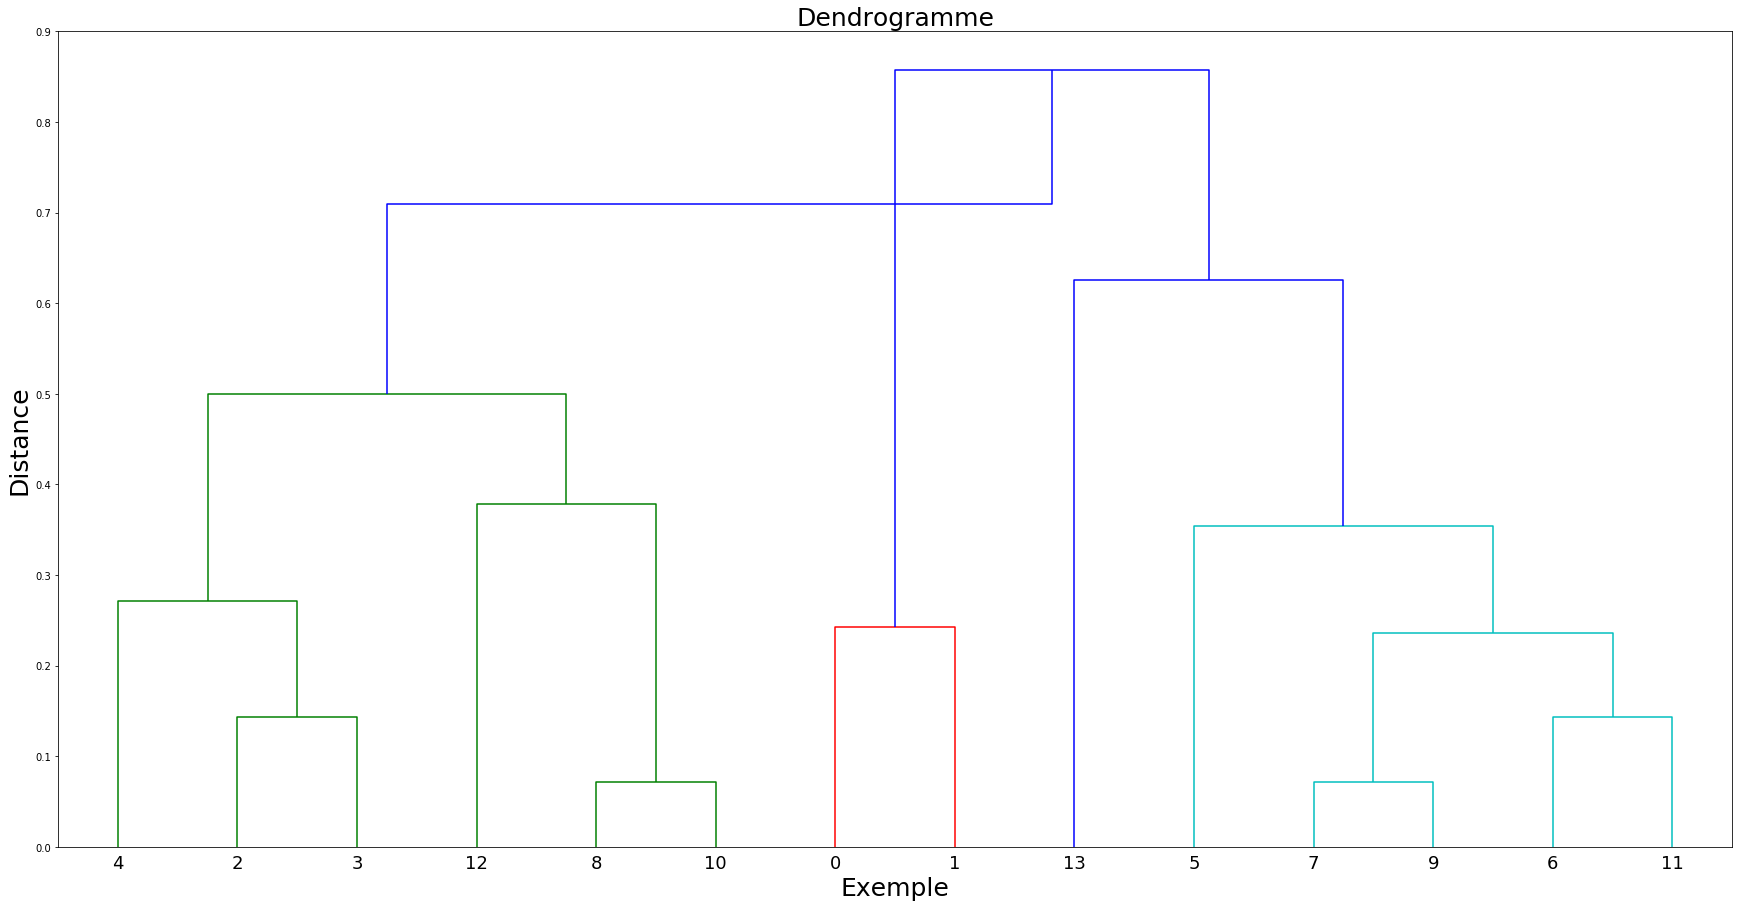

array([[ 8.        , 10.        ,  0.07142857,  2.        ],
       [ 7.        ,  9.        ,  0.07142857,  2.        ],
       [ 2.        ,  3.        ,  0.14285714,  2.        ],
       [ 6.        , 11.        ,  0.14285714,  2.        ],
       [15.        , 17.        ,  0.23571429,  2.        ],
       [ 0.        ,  1.        ,  0.24285714,  2.        ],
       [ 4.        , 16.        ,  0.27142857,  2.        ],
       [ 5.        , 18.        ,  0.35357143,  2.        ],
       [12.        , 14.        ,  0.37857143,  2.        ],
       [20.        , 22.        ,  0.5       ,  2.        ],
       [13.        , 21.        ,  0.62571429,  2.        ],
       [19.        , 24.        ,  0.85714286,  2.        ],
       [23.        , 25.        ,  0.70952381,  2.        ]])

In [44]:
print("Clustering en utilisant la distance de Manhattan")
clustering_hierarchique('manhattan', M_data2D)

#courant = initialise(M_data2D)
#print(courant)

Les clusterings obtenus par les distances de Manhattan et Euclidienne ont plusieurs points en commun. Ils commencent ainsi par regoruper les mêmes paires de points : 8 et 10, 7 et 9, 2 et 3, et 6 et 11, avec d'autres regroupements similaires dans la suite, comme celui de 0 avec 1, ou de la paire (2, 3) avec 4. En s'arrêtant à la distance 0.5 (utilisée dans la coloration des dendrogrammes), on obtient les classes
`{2, 3, 4}, {12, 8, 10}, {0, 1}, {13, 6, 11, 7, 9, 5}`
pour la distance Euclidienne et 
`{6, 11, 7, 9, 5}, {13}, {0, 1}, {2, 3, 4, 12, 8, 10}`
pour celle de Manhattan. On remarque ainsi que le seul groupe en commun est `{0, 1}`. La distance de Manhattan regroupe les classes `{2, 3, 4}` et `{12, 8, 10}`, qui avaient été séparées par la distance Euclidienne, et sépare le `13` de la classe `{13, 6, 11, 7, 9, 5}`.

La différence principale entre las distances Euclidienne et de Manhattan est que la distance Euclidienne est isotrope, elle prend toutes les directions de l'espace en considération de la même façon, alors que, pour la distance de Manhattan, les directions horizontale et verticale sont privilegiées. Ainsi, les paires de points 8 et 10, 7 et 9, 2 et 3, et 6 et 11 ont les mêmes distances Euclidienne et de Manhattan car ils sont alignés soit à l'horizontale, soit à la verticale, mais la distance de Manhattan entre les points 0 et 1 est de 0.24285714, supérieure à la distance Euclidienne de 0.17437937, car ces points sont alignés de façon diagonale. C'est cette pénalisation des diagonales par la distance de Manhattan qui explique les différences de classement.

On remarque que dans le dendrogramme fait avec la distance de Manhattan la distance utilisée pour regrouper des clusters de données diminue entre l'avant-dernière et la dernière étape. Cela étant inattendu, on a essayé de mieux comprendre le phénomène.

Fusion de 8 et 10 pour une distance de 0.0714285714285714
Fusion de 7 et 9 pour une distance de 0.07142857142857151
Fusion de 2 et 3 pour une distance de 0.14285714285714285
Fusion de 6 et 11 pour une distance de 0.1428571428571429
Fusion de 15 et 17 pour une distance de 0.23571428571428554
Fusion de 0 et 1 pour une distance de 0.24285714285714283
Fusion de 4 et 16 pour une distance de 0.27142857142857146
Fusion de 5 et 18 pour une distance de 0.35357142857142854
Fusion de 12 et 14 pour une distance de 0.3785714285714285
Fusion de 20 et 22 pour une distance de 0.5000000000000001
Fusion de 13 et 21 pour une distance de 0.6257142857142859
Centroïdes gauche :
19 : [0.07142857 0.55      ]
23 : [0.48809524 0.06666667]
24 : [0.67857143 0.8       ]
Distances de Manhattan :
d(19, 23) = 0.9
d(19, 24) = 0.857142857142857
d(23, 24) = 0.9238095238095236
Fusion de 19 et 24 pour une distance de 0.857142857142857
Centroïdes droite :
23 : [0.48809524 0.06666667]
25 : [0.52678571 0.7375    ]
Distances 

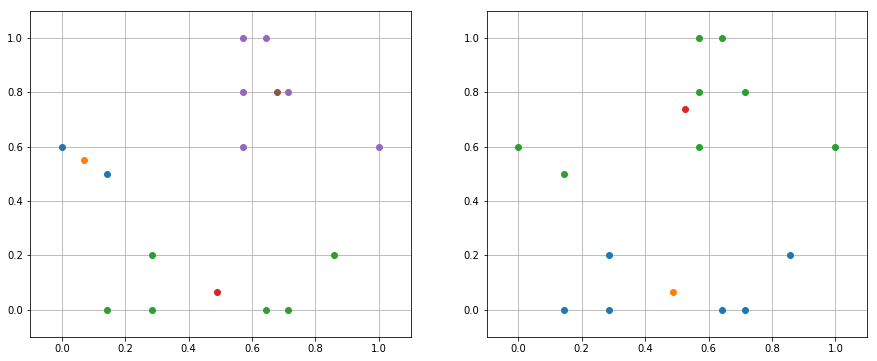

In [39]:
courant = initialise(M_data2D)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
#on avance jusqu'a l'etape qui nous interesse
for i in range(11):
    courant, _, _, _ = fusionne("manhattan", courant)
#on trace la figure de gauche, avec les points divisés en 3 groupes et ses respectifs centroides    
print("Centroïdes gauche :")
for k in courant:
    ax[0].scatter(courant[k][:, 0], courant[k][:, 1])
    cent = centroide(courant[k])
    print(k,":",cent)
    ax[0].scatter(cent[0], cent[1])
    ax[0].set_xlim(-0.1, 1.1)
    ax[0].set_ylim(-0.1, 1.1)
    ax[0].grid(True)
    ax[0].set_axisbelow(True)
print("Distances de Manhattan :")
indexes = list(courant)
for i in range(len(indexes)):
    for j in range(i+1, len(indexes)):
        print("d({}, {}) = {}".format(indexes[i], indexes[j], dist_vect("manhattan", centroide(courant[indexes[i]]),\
                                                centroide(courant[indexes[j]]))))
#on fait une étape supplementaire de fusion    
courant, _, _, _ = fusionne("manhattan", courant)

#on trace la figure de droite, avec les points divisés en 2 groupes et ses respectifs centroides 
print("Centroïdes droite :")
for k in courant:
    ax[1].scatter(courant[k][:, 0], courant[k][:, 1])
    cent = centroide(courant[k])
    print(k,":",cent)
    ax[1].scatter(cent[0], cent[1])
    ax[1].set_xlim(-0.1, 1.1)
    ax[1].set_ylim(-0.1, 1.1)
    ax[1].grid(True)
    ax[1].set_axisbelow(True)
print("Distances de Manhattan :")
indexes = list(courant)
for i in range(len(indexes)):
    for j in range(i+1, len(indexes)):
        print("d({}, {}) = {}".format(indexes[i],\
                                      indexes[j],\
                                      dist_vect("manhattan",\
                                                centroide(courant[indexes[i]]),\
                                                centroide(courant[indexes[j]]))))

On remarque sur la figure de gauche que les trois centroides sont à peu près à la même distance entre eux, avec les centroides en haut un peu plus proches (voir l'affichage des distances avant les graphes). Ce sont donc les deux groupes correspondants a ces centroides qui seront regroupés à la prochaine étape, comme vu a la figure de droite. Ce regroupement a un nouveau centroide qui a une distance plus petite au centroide du groupe en bas que les distances des deux centroides de l'étape précedente. 

Ce phénomène n'est pas intrinsèque à la distance de Manhattan,  il peu aussi se produire avec la distance euclidienne. Cela n'arrive pas avec les données utilisées ci-dessus car les régroupements sont differents, alors on a crée un exemple où cela arrive pour l'illustrer :

Centroïdes gauche :
0 : [0. 0.]
1 : [1. 0.]
2 : [0.5       0.8660254]
Distances Euclidienne :
d(0, 1) = 1.0
d(0, 2) = 0.9999999999999999
d(1, 2) = 0.9999999999999999
Fusion de 0 et 2 pour une distance de 0.9999999999999999
Centroïdes droite :
1 : [1. 0.]
3 : [0.25      0.4330127]
Distances Euclidienne :
d(1, 3) = 0.8660254037844386


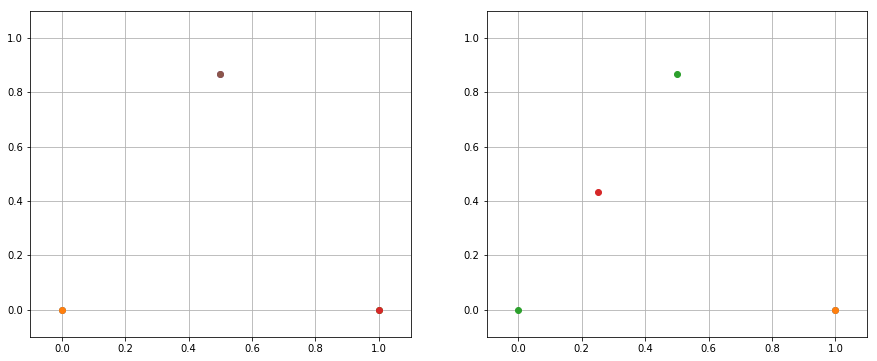

In [40]:
#on part de 3 points representant les sommets d'un triangle equilatéral
courant = initialise(np.array([[0, 0],\
                               [1, 0],\
                               [0.5, np.sqrt(3)/2]]))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#on trace la figure de gauche, avec les points divisés en 3 groupes et ses respectifs centroides    
print("Centroïdes gauche :")
for k in courant:
    ax[0].scatter(courant[k][:, 0], courant[k][:, 1])
    cent = centroide(courant[k])
    print(k,":",cent)
    ax[0].scatter(cent[0], cent[1])
    ax[0].set_xlim(-0.1, 1.1)
    ax[0].set_ylim(-0.1, 1.1)
    ax[0].grid(True)
    ax[0].set_axisbelow(True)
print("Distances Euclidienne :")
indexes = list(courant)
for i in range(len(indexes)):
    for j in range(i+1, len(indexes)):
        print("d({}, {}) = {}".format(indexes[i],\
                                      indexes[j],\
                                      dist_vect("euclidienne",\
                                                centroide(courant[indexes[i]]),\
                                                centroide(courant[indexes[j]]))))
#on fait une étape de fusion      
courant, _, _, _ = fusionne("euclidienne", courant)

#on trace la figure de droite, avec les points divisés en 2 groupes et ses respectifs centroides 
print("Centroïdes droite :")
for k in courant:
    ax[1].scatter(courant[k][:, 0], courant[k][:, 1])
    cent = centroide(courant[k])
    print(k,":",cent)
    ax[1].scatter(cent[0], cent[1])
    ax[1].set_xlim(-0.1, 1.1)
    ax[1].set_ylim(-0.1, 1.1)
    ax[1].grid(True)
    ax[1].set_axisbelow(True)
    
print("Distances Euclidienne :")
indexes = list(courant)
for i in range(len(indexes)):
    for j in range(i+1, len(indexes)):
        print("d({}, {}) = {}".format(indexes[i],\
                                      indexes[j],\
                                      dist_vect("euclidienne",\
                                                centroide(courant[indexes[i]]),\
                                                centroide(courant[indexes[j]]))))

Au départ on a trois groupes équidistants, chacun avec un point. La fonction `fusionne` choisit de regrouper le deux points le plus à gauche : On a donc deux groupes, et le centroide du premier groupe est le point moyen entre le deux points regroupés. Sa distance au autre point est égale à la hauteur du triangle equilatéral qui vaut donc $\frac{\sqrt 3}{2} < 1$

Ainsi, la diminution de la distance n'est pas due à la distance utilisée mais au fait qu'on utilise une chaînage par centroide.  

### Variante 2: chaînage complet (maximum des distances)

On considère maintenant l'approche "complete linkage". 

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_max_groupes</code> qui, étant donné deux clusters, calcule leur distance ainsi définie. Cette fonction prend 3 arguments: un nom de distance à utiliser ("euclidienne" ou "manhattan") et deux clusters.
On fait l'hypothèse que les 2 clusters contiennent au moins un exemple.


In [26]:
def dist_max_groupes(chaine, mat1, mat2):
    dist_max = 0
    for i in mat1:
        for j in mat2:
            if dist_vect(chaine, i, j) > dist_max:
                dist_max = dist_vect(chaine, i, j)
    return dist_max

In [27]:
dist_max_groupes("euclidienne", M_data2D[0:5], M_data2D[6:13])

1.118033988749895

La distance <code>dist_max_groupes</code> est utilisée lors d'un clustering hiérarchique basé sur un chaînage complet.

<font size="+1" color="RED">**[Q]**</font> Implémenter une variante du clustering hiérarchique qui utilise cette distance.

In [65]:
def clustering_hierarchique_complete_linkage(chaine, df, x_names = None):
    courant = initialise(df)       # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        novo, k1, k2, dist_min = fusionne_complete_linkage(chaine, courant)
        if(len(M_Fusion) == 0):
            M_Fusion = [k1, k2, dist_min, 2]
        else:
            M_Fusion = np.vstack([M_Fusion,[k1, k2, dist_min, 2]])
        courant = novo
    dessine_dendrogramme(M_Fusion, x_names)
    return M_Fusion



def fusionne_complete_linkage(chaine, C0):
    minA = 0
    minB = 0
    dist_min = float("inf")
    for i in C0:
        for j in C0:
            if i != j:
                if dist_max_groupes(chaine, C0[i], C0[j]) < dist_min:
                    minA = i
                    minB = j
                    dist_min = dist_max_groupes(chaine, C0[i], C0[j])
    res = {i: C0[i] for i in C0 if i != minA and i != minB}
    res[max(C0) + 1] = np.concatenate((C0[minA], C0[minB]))
    print("Fusion de {} et {} pour une distance de {}".format(minA, minB, dist_min))
    return res, minA, minB, dist_min    

On teste le nouvel clustering avec les données precedentes :

Clustering chaînage complet en utilisant la distance euclidienne
Fusion de 8 et 10 pour une distance de 0.0714285714285714
Fusion de 7 et 9 pour une distance de 0.07142857142857151
Fusion de 2 et 3 pour une distance de 0.14285714285714285
Fusion de 6 et 11 pour une distance de 0.1428571428571429
Fusion de 0 et 1 pour une distance de 0.17437936593905287
Fusion de 15 et 17 pour une distance de 0.2457807219155036
Fusion de 4 et 16 pour une distance de 0.24578072191550362
Fusion de 12 et 14 pour une distance de 0.2931183504097598
Fusion de 5 et 19 pour une distance de 0.40632750438079696
Fusion de 13 et 22 pour une distance de 0.5862367008195198
Fusion de 18 et 20 pour une distance de 0.6645544771207432
Fusion de 21 et 24 pour une distance de 0.945882591842677
Fusion de 23 et 25 pour une distance de 1.118033988749895


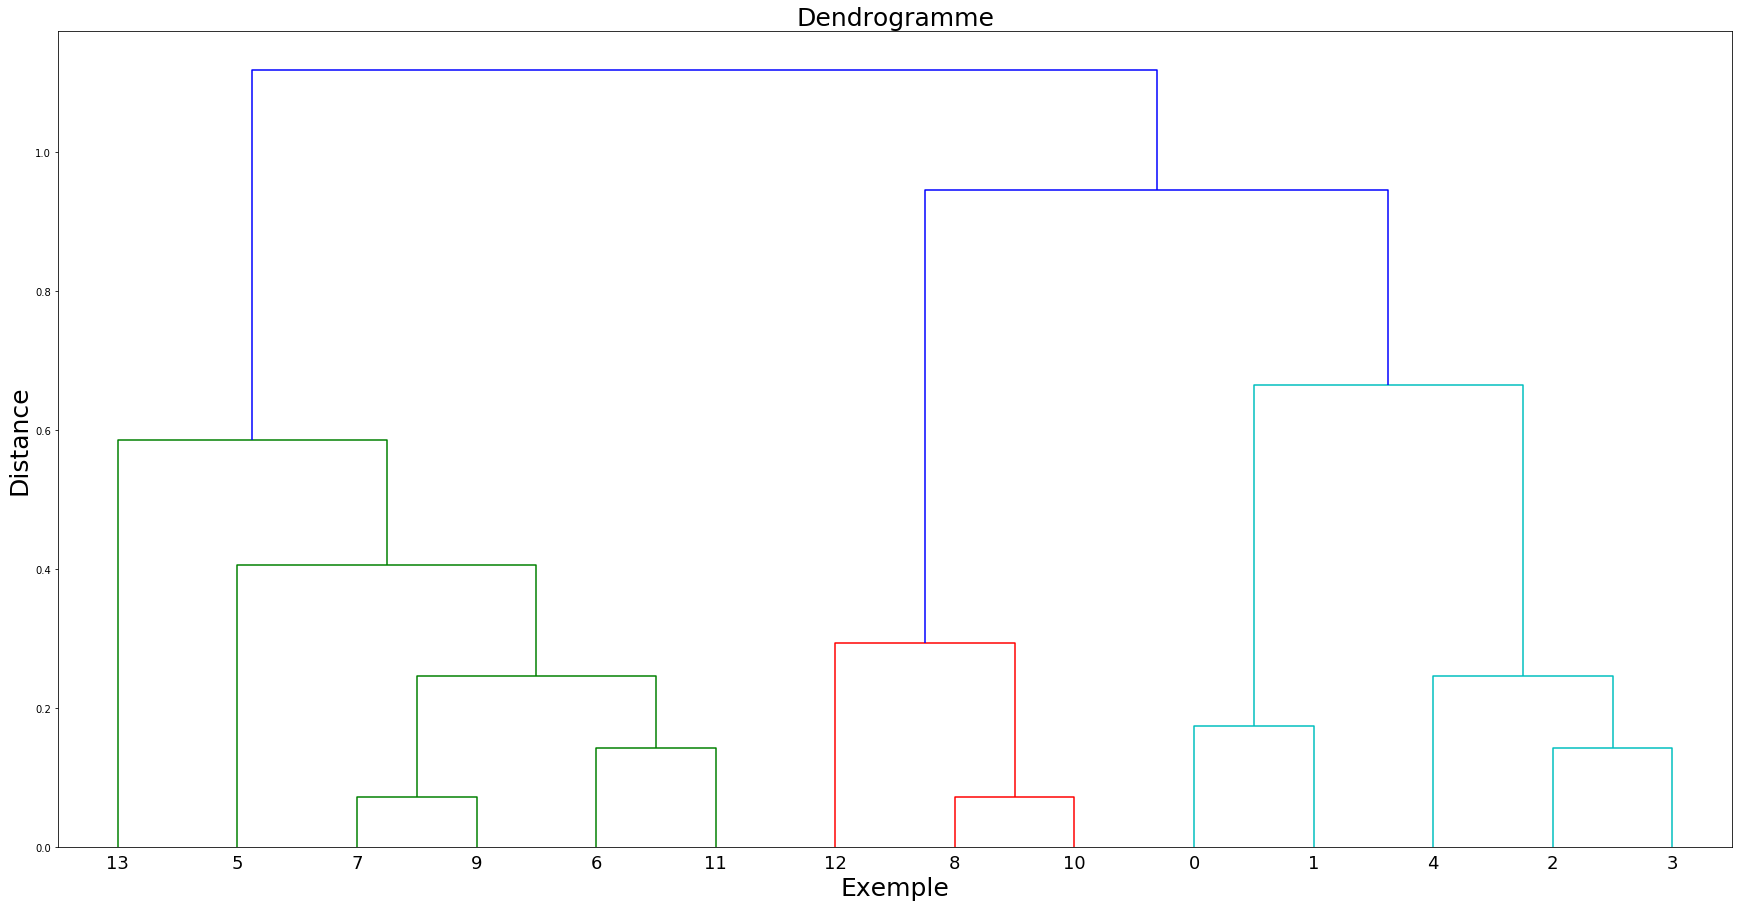

array([[ 8.        , 10.        ,  0.07142857,  2.        ],
       [ 7.        ,  9.        ,  0.07142857,  2.        ],
       [ 2.        ,  3.        ,  0.14285714,  2.        ],
       [ 6.        , 11.        ,  0.14285714,  2.        ],
       [ 0.        ,  1.        ,  0.17437937,  2.        ],
       [15.        , 17.        ,  0.24578072,  2.        ],
       [ 4.        , 16.        ,  0.24578072,  2.        ],
       [12.        , 14.        ,  0.29311835,  2.        ],
       [ 5.        , 19.        ,  0.4063275 ,  2.        ],
       [13.        , 22.        ,  0.5862367 ,  2.        ],
       [18.        , 20.        ,  0.66455448,  2.        ],
       [21.        , 24.        ,  0.94588259,  2.        ],
       [23.        , 25.        ,  1.11803399,  2.        ]])

In [29]:
print("Clustering chaînage complet en utilisant la distance euclidienne")
clustering_hierarchique_complete_linkage('euclidienne', M_data2D)

Clustering chaînage complet en utilisant la distance de Manhattan
Fusion de 8 et 10 pour une distance de 0.0714285714285714
Fusion de 7 et 9 pour une distance de 0.07142857142857151
Fusion de 2 et 3 pour une distance de 0.14285714285714285
Fusion de 6 et 11 pour une distance de 0.1428571428571429
Fusion de 0 et 1 pour une distance de 0.24285714285714283
Fusion de 4 et 16 pour une distance de 0.34285714285714286
Fusion de 15 et 17 pour une distance de 0.34285714285714286
Fusion de 12 et 14 pour une distance de 0.4142857142857142
Fusion de 5 et 13 pour une distance de 0.4285714285714286
Fusion de 20 et 22 pour une distance de 0.8285714285714286
Fusion de 18 et 19 pour une distance de 0.8857142857142857
Fusion de 21 et 23 pour une distance de 1.1428571428571428
Fusion de 24 et 25 pour une distance de 1.5


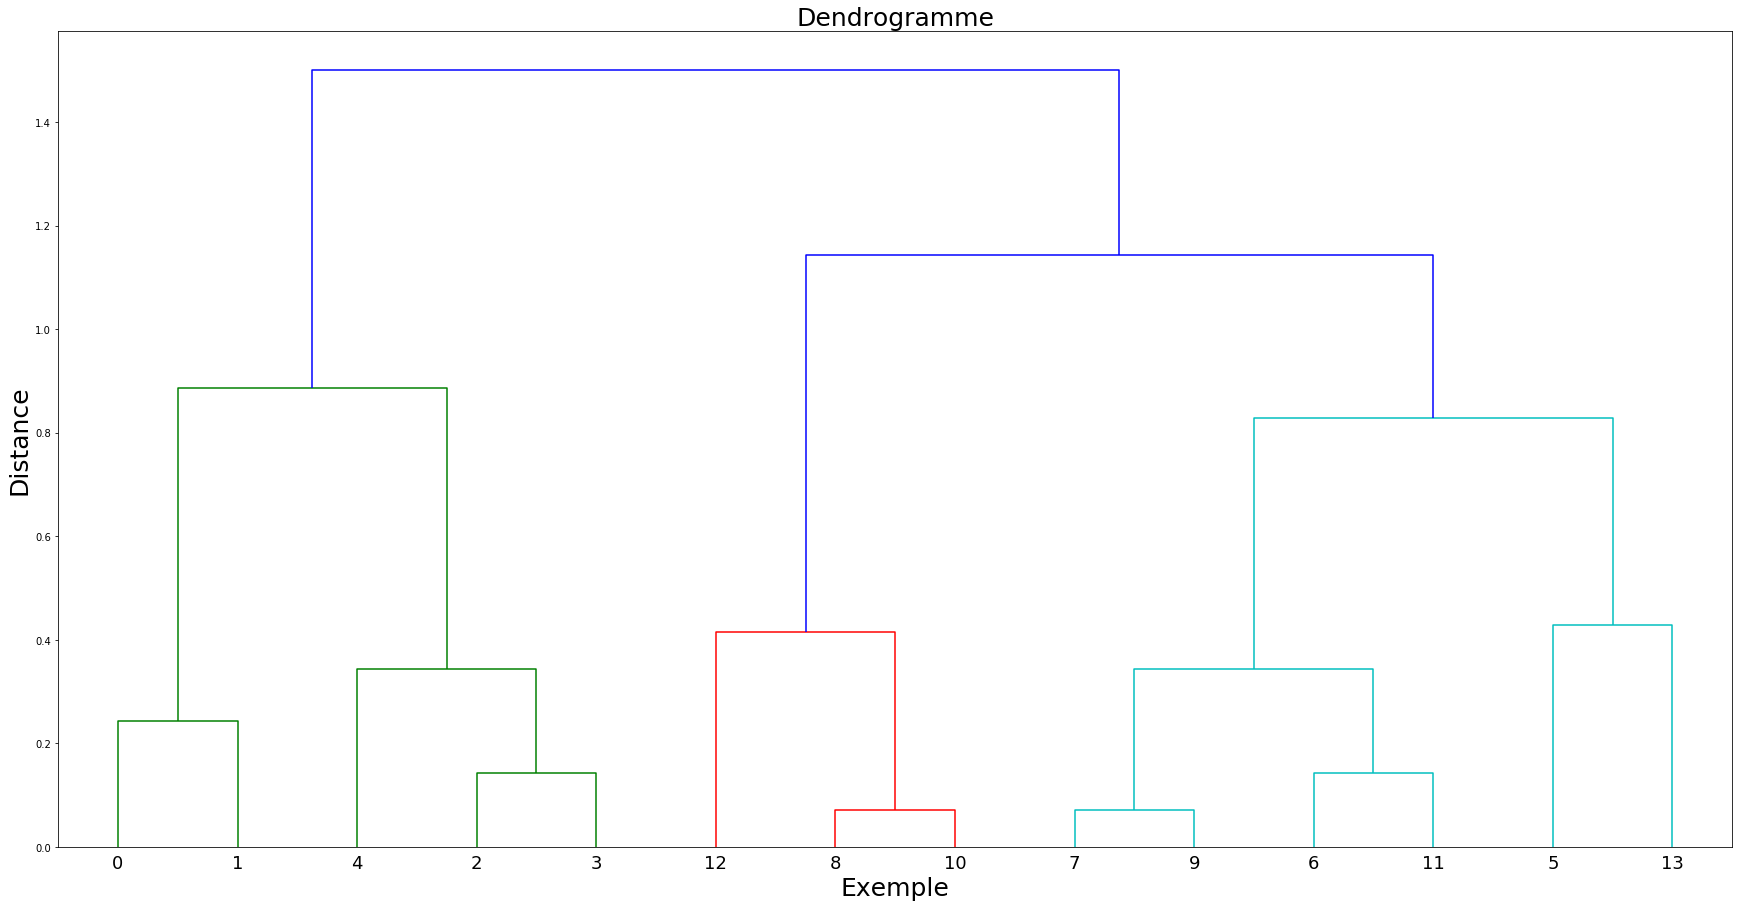

array([[ 8.        , 10.        ,  0.07142857,  2.        ],
       [ 7.        ,  9.        ,  0.07142857,  2.        ],
       [ 2.        ,  3.        ,  0.14285714,  2.        ],
       [ 6.        , 11.        ,  0.14285714,  2.        ],
       [ 0.        ,  1.        ,  0.24285714,  2.        ],
       [ 4.        , 16.        ,  0.34285714,  2.        ],
       [15.        , 17.        ,  0.34285714,  2.        ],
       [12.        , 14.        ,  0.41428571,  2.        ],
       [ 5.        , 13.        ,  0.42857143,  2.        ],
       [20.        , 22.        ,  0.82857143,  2.        ],
       [18.        , 19.        ,  0.88571429,  2.        ],
       [21.        , 23.        ,  1.14285714,  2.        ],
       [24.        , 25.        ,  1.5       ,  2.        ]])

In [30]:
print("Clustering chaînage complet en utilisant la distance de Manhattan")
clustering_hierarchique_complete_linkage('manhattan', M_data2D)

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Récupérer les données concernant le traitement des déchets de la ville de Paris :
http://opendata.paris.fr/explore/dataset/tonnages_des_dechets_bacs_jaunes/table/

**Attention**: il faut certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

Sauvegarder ces données, prêtes à être traitées par l'algorithme de clustering, au format CSV dans le répertoire <pre>data/</pre> sous le nom <pre>base-Paris.csv</pre>

<font size="+1" color="RED">**[Q]**</font> Etudier cette base et les clusters qui peuvent être mis en évidence.


In [31]:
data_Paris = pd.read_csv("data/base-Paris.csv", sep=';')

In [32]:
data_Paris.head(-1)

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Total arrondissement 2011
0,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1,NaN
1,75013,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4,NaN
2,75014,464,404.9,465.3,420.2,405.3,446,412.9,348.7,449.3,446.3,453.1,484.3,NaN
3,75015,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8,NaN
4,75017,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5,NaN
5,75018,427,394.3,455.2,419.9,458.3,456.6,418,361.8,464.6,453.4,478.5,470.9,NaN
6,75019,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281,345.6,335.6,367,354.5,NaN
7,75002,153,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8,NaN
8,75004,116.3,115.7,133.4,115,123.2,120.5,114.5,97.6,130.5,123,124.3,133.7,NaN
9,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4,NaN


In [33]:
data_Paris = data_Paris.drop(["Total arrondissement 2011"], axis=1)
data_Paris = data_Paris.drop([13])

data_Paris

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,75013,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,75014,464,404.9,465.3,420.2,405.3,446,412.9,348.7,449.3,446.3,453.1,484.3
3,75015,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,75017,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,75018,427,394.3,455.2,419.9,458.3,456.6,418,361.8,464.6,453.4,478.5,470.9
6,75019,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281,345.6,335.6,367,354.5
7,75002,153,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,75004,116.3,115.7,133.4,115,123.2,120.5,114.5,97.6,130.5,123,124.3,133.7
9,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [41]:
#On transforme le type des données en numerique
cols = data_Paris.columns[data_Paris.dtypes.eq('object')]
data_Paris[cols] = data_Paris[cols].apply(pd.to_numeric, errors='coerce')

#On recupère la matrice des données sans la colonne de code postale
mat_Paris = normalisation(data_Paris[data_Paris.columns[1:]])

<font size="+1" color="RED">**[Q]**</font> Préparer un rapport d'analyse (c'est-à-dire, compléter votre notebook en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.

On fait les quatre clusterings : par centroïde et par chaînage complet avec les distances euclidienne et de Manhattan et on fait une petite analyse à la fin.

Clustering en utilisant la distance euclidienne
Fusion de 0 et 16 pour une distance de 0.05980330904516489
Fusion de 7 et 8 pour une distance de 0.06995596956812182
Fusion de 2 et 4 pour une distance de 0.09034538002040293
Fusion de 15 et 18 pour une distance de 0.09099688490823389
Fusion de 19 et 23 pour une distance de 0.09608457631845164
Fusion de 5 et 22 pour une distance de 0.12348584942545547
Fusion de 14 et 24 pour une distance de 0.12453407045196078
Fusion de 17 et 25 pour une distance de 0.1553231849516947
Fusion de 9 et 26 pour une distance de 0.16357044635684204
Fusion de 10 et 27 pour une distance de 0.1812139091958864
Fusion de 6 et 12 pour une distance de 0.24168540846465464
Fusion de 13 et 21 pour une distance de 0.26550417696685485
Fusion de 1 et 11 pour une distance de 0.2757063809341908
Fusion de 20 et 28 pour une distance de 0.2890866853003415
Fusion de 29 et 30 pour une distance de 0.4321158905664246
Fusion de 31 et 33 pour une distance de 0.5247503537641786
Fusion 

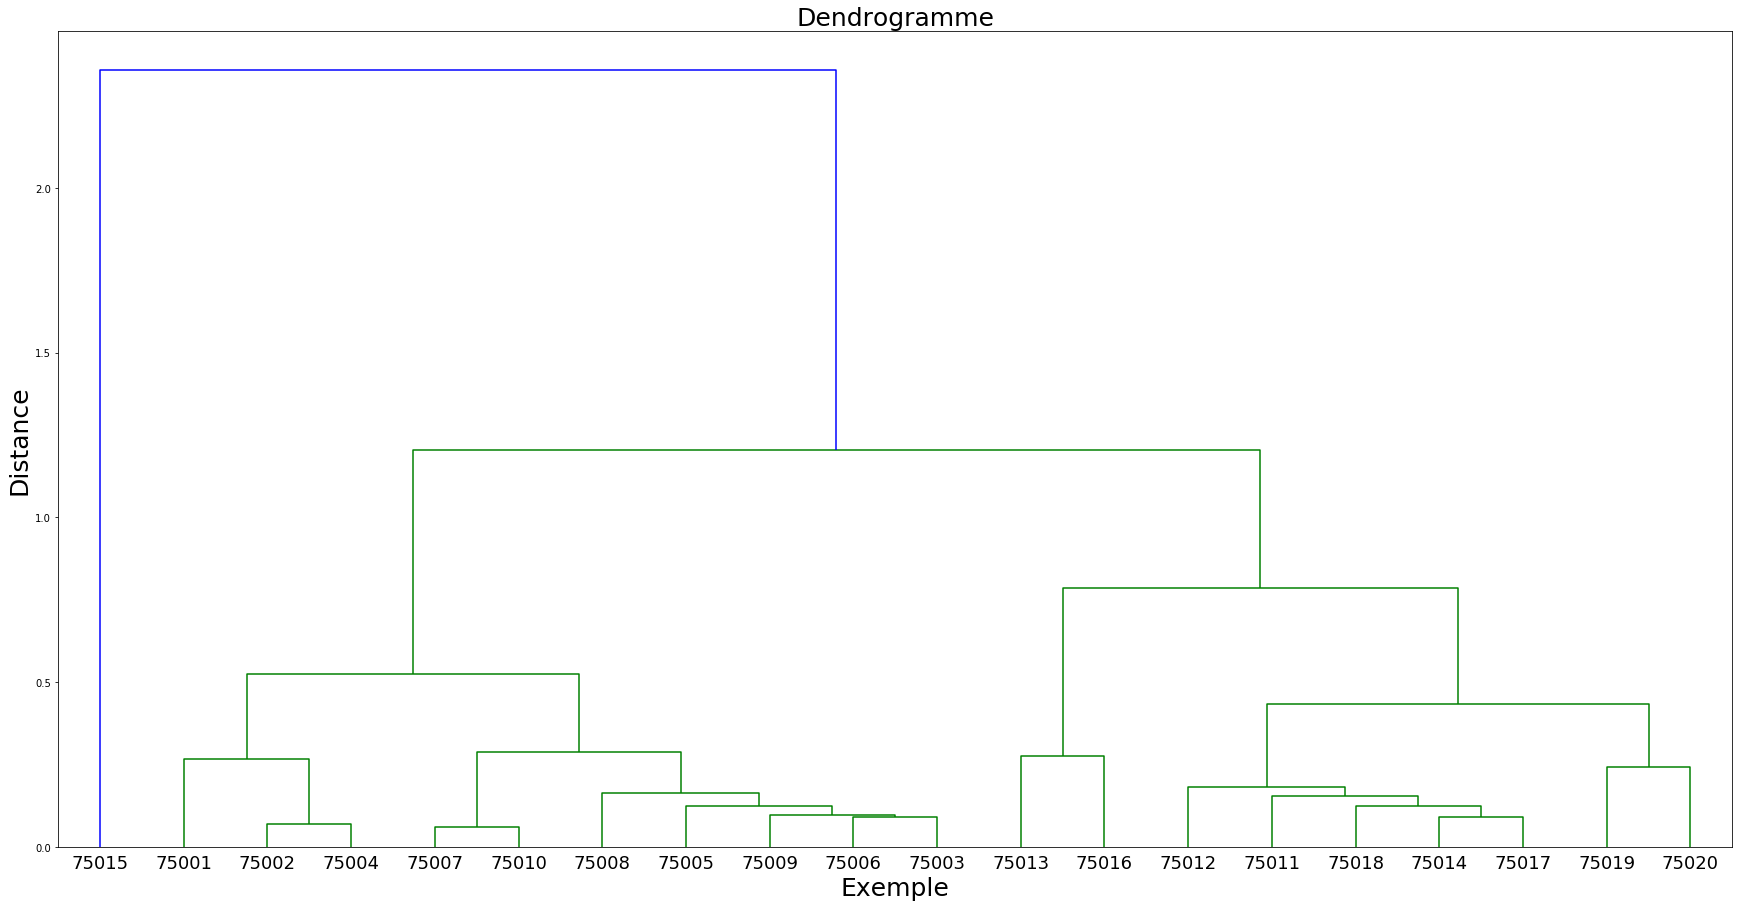

array([[ 0.        , 16.        ,  0.05980331,  2.        ],
       [ 7.        ,  8.        ,  0.06995597,  2.        ],
       [ 2.        ,  4.        ,  0.09034538,  2.        ],
       [15.        , 18.        ,  0.09099688,  2.        ],
       [19.        , 23.        ,  0.09608458,  2.        ],
       [ 5.        , 22.        ,  0.12348585,  2.        ],
       [14.        , 24.        ,  0.12453407,  2.        ],
       [17.        , 25.        ,  0.15532318,  2.        ],
       [ 9.        , 26.        ,  0.16357045,  2.        ],
       [10.        , 27.        ,  0.18121391,  2.        ],
       [ 6.        , 12.        ,  0.24168541,  2.        ],
       [13.        , 21.        ,  0.26550418,  2.        ],
       [ 1.        , 11.        ,  0.27570638,  2.        ],
       [20.        , 28.        ,  0.28908669,  2.        ],
       [29.        , 30.        ,  0.43211589,  2.        ],
       [31.        , 33.        ,  0.52475035,  2.        ],
       [32.        , 34.

In [62]:
print("Clustering en utilisant la distance euclidienne")
clustering_hierarchique('euclidienne', mat_Paris, data_Paris["Granularité"].values)

Clustering en utilisant la distance de Manhattan
Fusion de 0 et 16 pour une distance de 0.15514121759420235
Fusion de 7 et 8 pour une distance de 0.20094298606115393
Fusion de 2 et 4 pour une distance de 0.25052643145105596
Fusion de 15 et 19 pour une distance de 0.2736357638772213
Fusion de 18 et 23 pour une distance de 0.26901405120095256
Fusion de 5 et 22 pour une distance de 0.329711923872276
Fusion de 9 et 14 pour une distance de 0.36387711439638054
Fusion de 17 et 25 pour une distance de 0.4323492805465101
Fusion de 24 et 26 pour une distance de 0.46829383265225144
Fusion de 10 et 27 pour une distance de 0.565434942910491
Fusion de 6 et 12 pour une distance de 0.7842824910764548
Fusion de 1 et 11 pour une distance de 0.8772540810839015
Fusion de 13 et 21 pour une distance de 0.9087329739394056
Fusion de 20 et 28 pour une distance de 0.9782582560827247
Fusion de 29 et 30 pour une distance de 1.4859114141110923
Fusion de 32 et 33 pour une distance de 1.8094030213672445
Fusion de 31

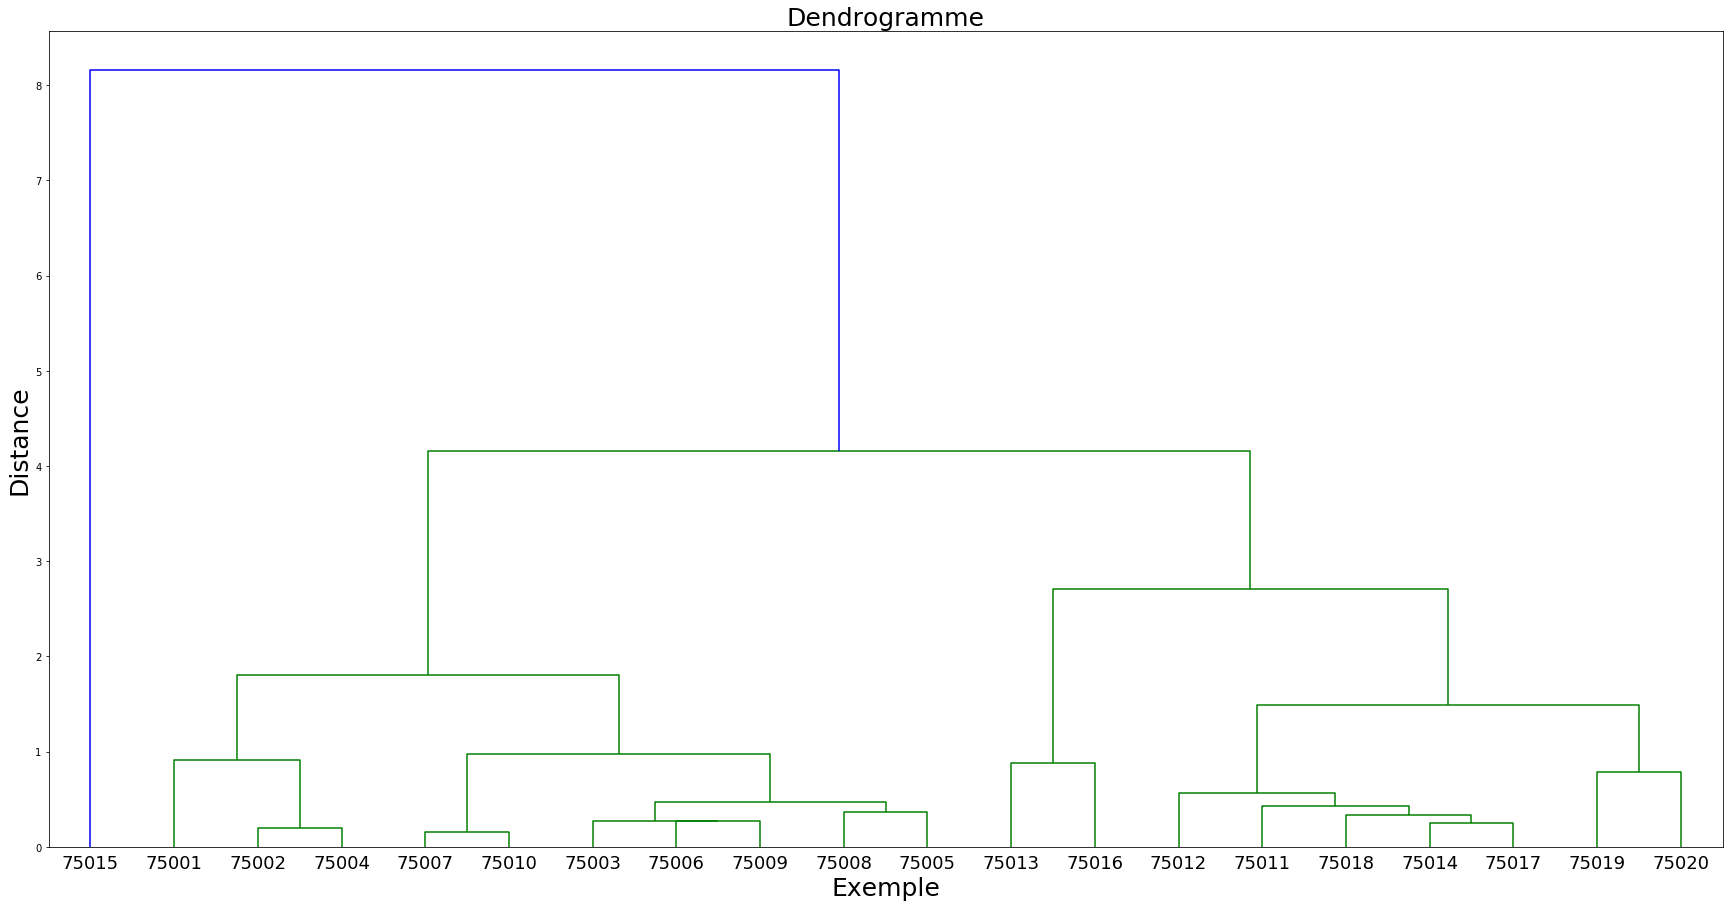

array([[ 0.        , 16.        ,  0.15514122,  2.        ],
       [ 7.        ,  8.        ,  0.20094299,  2.        ],
       [ 2.        ,  4.        ,  0.25052643,  2.        ],
       [15.        , 19.        ,  0.27363576,  2.        ],
       [18.        , 23.        ,  0.26901405,  2.        ],
       [ 5.        , 22.        ,  0.32971192,  2.        ],
       [ 9.        , 14.        ,  0.36387711,  2.        ],
       [17.        , 25.        ,  0.43234928,  2.        ],
       [24.        , 26.        ,  0.46829383,  2.        ],
       [10.        , 27.        ,  0.56543494,  2.        ],
       [ 6.        , 12.        ,  0.78428249,  2.        ],
       [ 1.        , 11.        ,  0.87725408,  2.        ],
       [13.        , 21.        ,  0.90873297,  2.        ],
       [20.        , 28.        ,  0.97825826,  2.        ],
       [29.        , 30.        ,  1.48591141,  2.        ],
       [32.        , 33.        ,  1.80940302,  2.        ],
       [31.        , 34.

In [63]:
print("Clustering en utilisant la distance de Manhattan")
clustering_hierarchique('manhattan', mat_Paris, data_Paris["Granularité"].values)

Clustering chaînage complet en utilisant la distance euclidienne
Fusion de 0 et 16 pour une distance de 0.05980330904516489
Fusion de 7 et 8 pour une distance de 0.06995596956812182
Fusion de 2 et 4 pour une distance de 0.09034538002040293
Fusion de 15 et 18 pour une distance de 0.09099688490823389
Fusion de 14 et 19 pour une distance de 0.09818154292330362
Fusion de 5 et 17 pour une distance de 0.14588555433594885
Fusion de 9 et 24 pour une distance de 0.16088812240051226
Fusion de 10 et 25 pour une distance de 0.19956051562208726
Fusion de 22 et 27 pour une distance de 0.21873669355625952
Fusion de 23 et 26 pour une distance de 0.2192318254370334
Fusion de 6 et 12 pour une distance de 0.24168540846465464
Fusion de 1 et 11 pour une distance de 0.2757063809341908
Fusion de 13 et 21 pour une distance de 0.294555978772269
Fusion de 20 et 29 pour une distance de 0.37996811342190495
Fusion de 28 et 30 pour une distance de 0.6520458836797397
Fusion de 32 et 33 pour une distance de 0.9147339

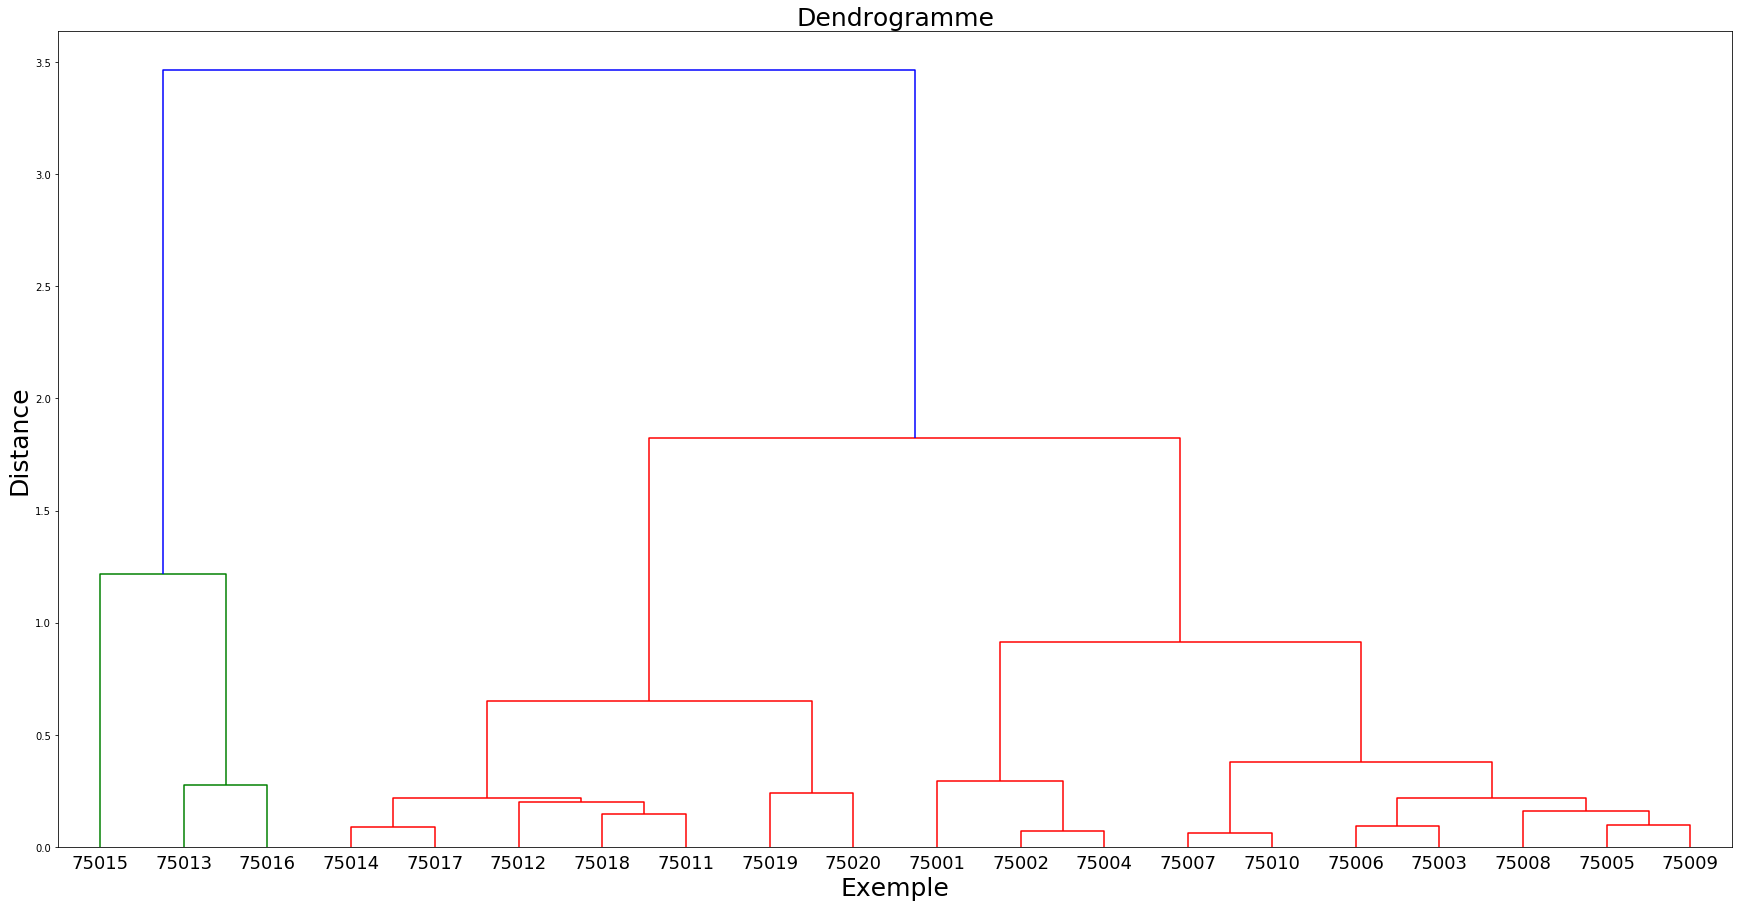

array([[ 0.        , 16.        ,  0.05980331,  2.        ],
       [ 7.        ,  8.        ,  0.06995597,  2.        ],
       [ 2.        ,  4.        ,  0.09034538,  2.        ],
       [15.        , 18.        ,  0.09099688,  2.        ],
       [14.        , 19.        ,  0.09818154,  2.        ],
       [ 5.        , 17.        ,  0.14588555,  2.        ],
       [ 9.        , 24.        ,  0.16088812,  2.        ],
       [10.        , 25.        ,  0.19956052,  2.        ],
       [22.        , 27.        ,  0.21873669,  2.        ],
       [23.        , 26.        ,  0.21923183,  2.        ],
       [ 6.        , 12.        ,  0.24168541,  2.        ],
       [ 1.        , 11.        ,  0.27570638,  2.        ],
       [13.        , 21.        ,  0.29455598,  2.        ],
       [20.        , 29.        ,  0.37996811,  2.        ],
       [28.        , 30.        ,  0.65204588,  2.        ],
       [32.        , 33.        ,  0.91473392,  2.        ],
       [ 3.        , 31.

In [66]:
print("Clustering chaînage complet en utilisant la distance euclidienne")
clustering_hierarchique_complete_linkage('euclidienne', mat_Paris, data_Paris["Granularité"].values)

Clustering chaînage complet en utilisant la distance de Manhattan
Fusion de 0 et 16 pour une distance de 0.15514121759420235
Fusion de 7 et 8 pour une distance de 0.20094298606115393
Fusion de 2 et 4 pour une distance de 0.25052643145105596
Fusion de 15 et 19 pour une distance de 0.2736357638772213
Fusion de 18 et 23 pour une distance de 0.3435302070287627
Fusion de 9 et 14 pour une distance de 0.36387711439638054
Fusion de 5 et 22 pour une distance de 0.40591689538085823
Fusion de 10 et 17 pour une distance de 0.4890437519807471
Fusion de 26 et 27 pour une distance de 0.6578937367868589
Fusion de 24 et 25 pour une distance de 0.7014878565612365
Fusion de 6 et 12 pour une distance de 0.7842824910764548
Fusion de 1 et 11 pour une distance de 0.8772540810839015
Fusion de 13 et 21 pour une distance de 1.004652114921424
Fusion de 20 et 29 pour une distance de 1.2900209314679358
Fusion de 28 et 30 pour une distance de 2.2089907248258878
Fusion de 32 et 33 pour une distance de 3.151609724740

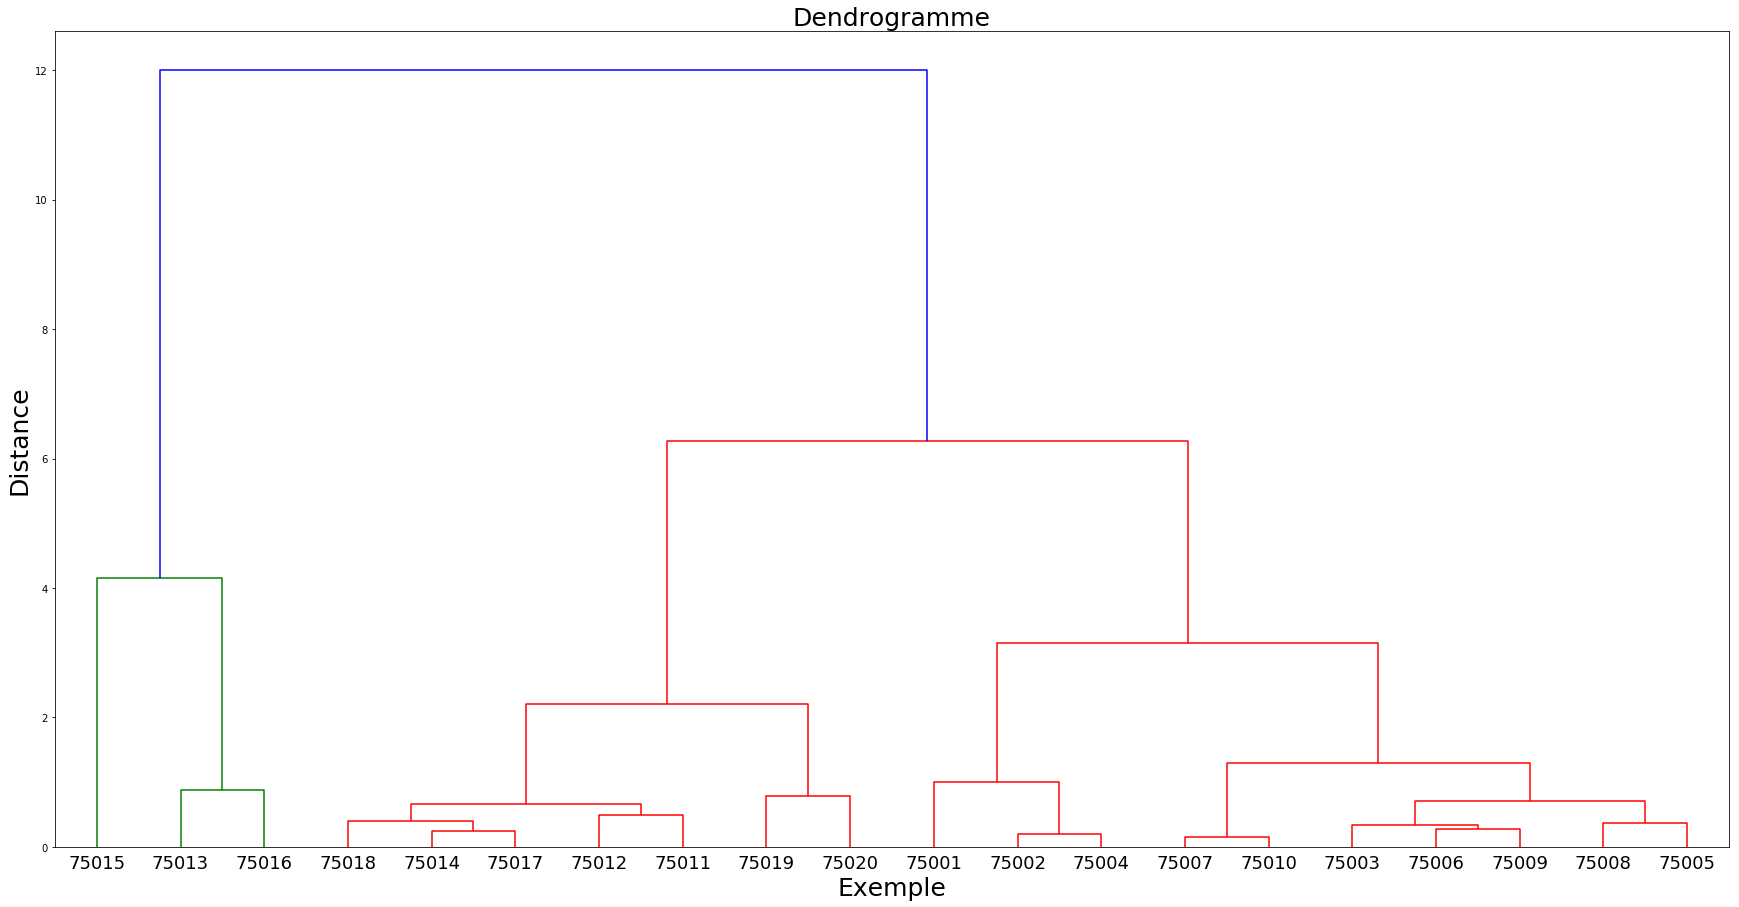

array([[ 0.        , 16.        ,  0.15514122,  2.        ],
       [ 7.        ,  8.        ,  0.20094299,  2.        ],
       [ 2.        ,  4.        ,  0.25052643,  2.        ],
       [15.        , 19.        ,  0.27363576,  2.        ],
       [18.        , 23.        ,  0.34353021,  2.        ],
       [ 9.        , 14.        ,  0.36387711,  2.        ],
       [ 5.        , 22.        ,  0.4059169 ,  2.        ],
       [10.        , 17.        ,  0.48904375,  2.        ],
       [26.        , 27.        ,  0.65789374,  2.        ],
       [24.        , 25.        ,  0.70148786,  2.        ],
       [ 6.        , 12.        ,  0.78428249,  2.        ],
       [ 1.        , 11.        ,  0.87725408,  2.        ],
       [13.        , 21.        ,  1.00465211,  2.        ],
       [20.        , 29.        ,  1.29002093,  2.        ],
       [28.        , 30.        ,  2.20899072,  2.        ],
       [32.        , 33.        ,  3.15160972,  2.        ],
       [ 3.        , 31.

In [67]:
print("Clustering chaînage complet en utilisant la distance de Manhattan")
clustering_hierarchique_complete_linkage('manhattan', mat_Paris, data_Paris["Granularité"].values)

Dans tous les clusterings, on observe que l'on peut classifier les arrondissements parisiens en trois groupes. Dans le clustering par centroïde, quelle que soit la distance utilisée, le premier groupe correspond au 15ème, on a un deuxième groupe avec les arrondissements du 1er au 10ème, et un troisième groupe avec les autres arrodissements. En regardant les données du dataframe, on remarque que le groupe du 15ème contient l'arrondissement avec la plus grande quantité de recyclage, le groupe du 1er au 10ème contient les arrondissements avec la plus petite quantité de recyclage, et le dernier groupe contient les arrondissements avec une quantité intermédiaire de recyclage. Dans le clustering par chaînage complet, la seule différence dans le résultat est que le 13ème et le 16ème sont regroupés avec le 15ème.

## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

<font color="RED" size="+1">**[Q]**</font> Montrer que la distance de Manhattan est bien une mesure de distance.

Soit 3 points, $x, y, z \in \mathbb R^p$. On a:

$
\displaystyle
d(x, x) = \sum_{j = 1}^p|x_j - x_j| = \sum_{j = 1}^p|0| = 0
$

$
\displaystyle
d(x, y) = \sum_{j = 1}^p|x_j - y_j| = \sum_{j = 1}^p|y_j - x_j| = d(y, x)
$

$
\begin{aligned}
d(x, z) &= \sum_{j = 1}^p|x_j - z_j| = \sum_{j = 1}^p|x_j - y_j + y_j - z_j|\\
&\leq \sum_{j = 1}^p\left(|x_j - y_j| + |y_j - z_j|\right) = \sum_{j = 1}^p|x_j - y_j| + \sum_{j = 1}^p|y_j - z_j| = d(x, y) + d(y, z)
\end{aligned}
$

<font color="RED" size="+1">**[Q]**</font> Dans le cours, 4 approches possibles ont été données afin de calculer la distance entre 2 groupes :
- l'approche du chaînage minimum est appelée "simple linkage"
- l'approche du chaînage maximum, est appelée "complete linkage"
- l'approche du chaînage moyenne est appelée "average linkage"
- l'approche du par centre de gravité est appelée "centroid linkage"

On considère une mesure de distance $d$. Soit $A =\{a_1,a_2,...,a_{|A|}\}$ et $B =\{b_1,b_2,...,b_{|B|}\}$ deux groupes d'exemples. Donner l'expression de la distance entre $A$ et $B$ pour chacune des approches.

- Chaînage minimum : $\displaystyle d(A, B) = \min_{\substack{i \in \{1, \dotsc, |A|\} \\ j \in \{1, \dotsc, |B|\}}}d(a_i, b_j)$
- Chaînage maximum : $\displaystyle d(A, B) = \max_{\substack{i \in \{1, \dotsc, |A|\} \\ j \in \{1, \dotsc, |B|\}}}d(a_i, b_j)$
- Chaînage moyenne : $\displaystyle d(A, B) = \frac{1}{\lvert A\rvert \lvert B\rvert}\sum_{i=1}^{|A|} \sum_{j=1}^{|B|} d(a_i, b_j)$
- Par centre de gravité : $\displaystyle d(A, B) = d\left(\frac{1}{|A|} \sum_{i=1}^{|A|} a_i, \frac{1}{|B|} \sum_{j=1}^{|B|} b_j\right)$

<font color="RED" size="+1">**[Q]**</font> En utilisant la distance euclidienne et l'approche "centroid linkage", appliquer, "à la main", l'algorithme de clustering hiérarchique, méthode par agglomération, sur les données fournies sur le transparent 10 du cours 2 (coin haut gauche). Dans cette page, les données correspondent à 9 points dans un espace 2D: $X_1 \times X_2$. Le point 1 est le point de coordonnées $(-0.5, -1.0)$, etc. 
Construire le dendrogramme correspondant.

rem : dans la page du cours, les 3 premiers clusters construits sont donnés.


Je n'ai pas accès aux transparents du cours, ils ne sont pas encore en ligne. 


<font color="RED" size="+1">**[Q]**</font> *(examen 2018)*
On considère la base d'apprentissage de $[0,10]\times [0,10]$ contenant les 7 exemples suivants: $\mathcal{X}=\{(1,2)$, $(1,4)$, $(3,4)$, $(3,5)$, $(6,2)$, $(6,5)$, $(8,3)\}$ (remarque: cette base est déjà normalisée).
En détaillant les étapes et en expliquant les calculs réalisés et les regroupements effectués, appliquer sur $\mathcal{X}$ l'algorithme de classification hiérarchique, version ascendante, en utilisant l'approche ``centroid linkage'' et la distance euclidienne.  Donner le dendrogramme obtenu.
<font color="RED" size="+1">**[Q]**</font> Si on rajoute l'exemple $(5,5)$ dans $\mathcal{X}$ de la question précédente, sans ré-appliquer l'algorithme donner, en les justifiant, les modifications apportées au dendrogramme précédent par l'ajout de cet exemple.

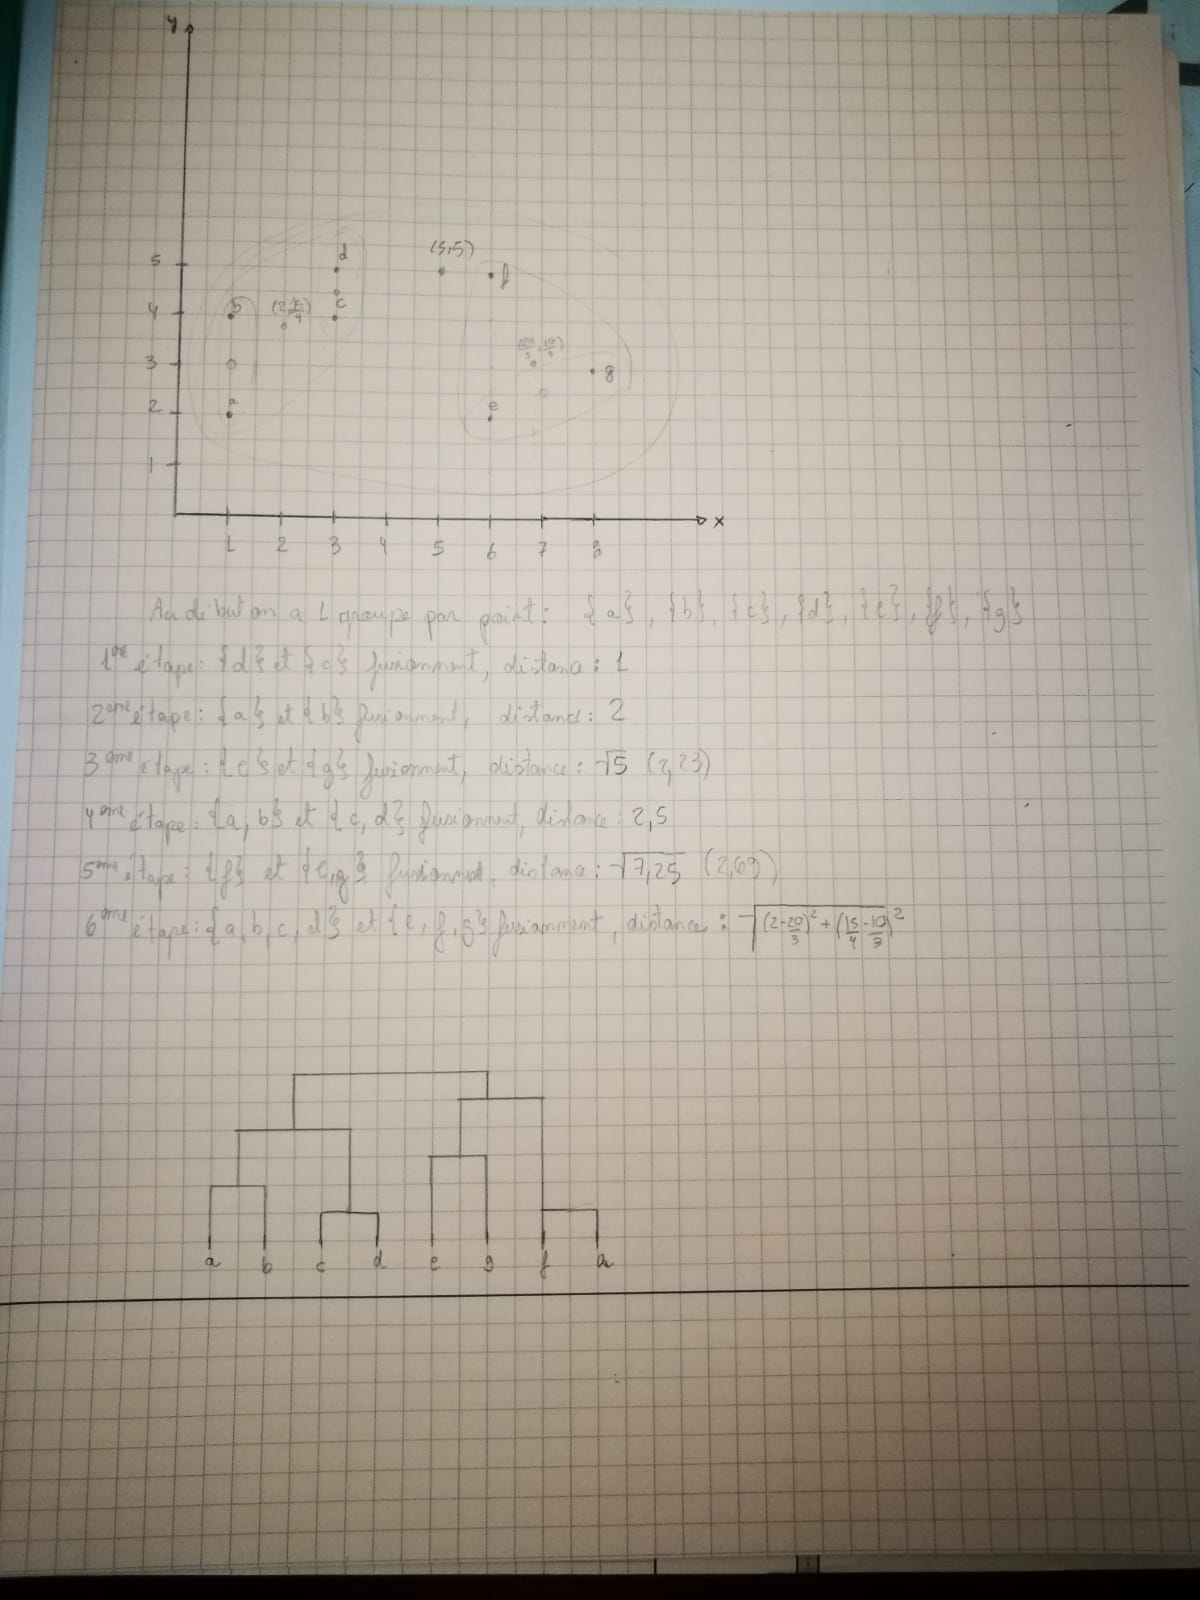